# GBM. Задача классификация

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("../datasets/mushroom_cleaned.csv")

x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=["class"]), data["class"], test_size=0.2, random_state=42)
data

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


### Создание конвейера

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
pipe = Pipeline((("scaler", StandardScaler()), ("gbt", GradientBoostingClassifier())))

### Обучение модели с различными комбинациями параметров

In [4]:
grid = {
    "gbt__learning_rate": [0.05, 0.1],
    "gbt__n_estimators": [1000],
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ....gbt__learning_rate=0.05, gbt__n_estimators=1000; total time=  48.4s
[CV] END ....gbt__learning_rate=0.05, gbt__n_estimators=1000; total time=  48.2s
[CV] END ....gbt__learning_rate=0.05, gbt__n_estimators=1000; total time=  48.5s
[CV] END ....gbt__learning_rate=0.05, gbt__n_estimators=1000; total time=  48.5s
[CV] END ....gbt__learning_rate=0.05, gbt__n_estimators=1000; total time=  47.9s
[CV] END .....gbt__learning_rate=0.1, gbt__n_estimators=1000; total time=  47.7s
[CV] END .....gbt__learning_rate=0.1, gbt__n_estimators=1000; total time=  48.5s
[CV] END .....gbt__learning_rate=0.1, gbt__n_estimators=1000; total time=  50.9s
[CV] END .....gbt__learning_rate=0.1, gbt__n_estimators=1000; total time=  51.6s
[CV] END .....gbt__learning_rate=0.1, gbt__n_estimators=1000; total time=  49.9s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=(('scaler', StandardScaler()),
                                       ('gbt', GradientBoostingClassifier()))),
             param_grid={'gbt__learning_rate': [0.05, 0.1],
                         'gbt__n_estimators': [1000]},
             verbose=2)

### Проверка точности

In [5]:
best_model = grid_search.best_estimator_
best_model.score(x_test, y_test)

0.9776996391227908

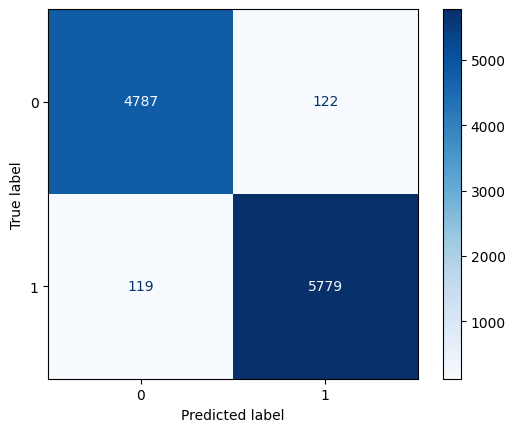

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = best_model.predict(x_test)

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
)

### Сериализация модели и сохранние в файл

In [7]:
import pickle

pickle.dump(best_model, open("buba", "wb"))
old_model = pickle.load(open("buba", "rb"))
old_model.get_params, old_model.score(x_test, y_test)

(<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                 ('gbt', GradientBoostingClassifier(n_estimators=1000))])>,
 0.9776996391227908)